In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor 


In [2]:
sys.path.insert(1, '/home/ujwal/ML_program/Trading_financial_market/Predicting_AUDUSD_Using_Major_Regression_Models')
from ipynb.fs.defs.Data_preprocessing import sampling_multi_target


In [3]:
n_steps_back = 60
n_steps_future=10

train_X, train_Y, val_X, val_Y, test_X, test_Y,  = sampling_multi_target(n_steps_back, n_steps_future)

In [4]:
train_X.shape

(92464, 60)

In [5]:
train_Y.shape

(92464, 10)

In [12]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
def return_score(param):
    DTRModel = DecisionTreeRegressor(**param)  
    mae = np.mean(cross_val_score(DTRModel,train_X, train_Y, cv = 4, n_jobs =-1,scoring=make_scorer(mean_absolute_error)))
    return mae


In [11]:
DTRModel.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [9]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [27]:
import optuna
from sklearn.metrics import mean_absolute_error 
import numpy as np
import pandas as pd

def objective(trial):
    param = {
        # "criterion": "absolute_error",
        "splitter": trial.suggest_categorical("splitter", ["random","best"]),
        "max_depth": trial.suggest_int("max_depth", 1, 1000),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 800),
        "min_weight_fraction_leaf": trial.suggest_float("min_weight_fraction_leaf", 0, 0.5),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 100),      
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 2, 500),
        "ccp_alpha": trial.suggest_float("ccp_alpha", 0, 10),
        "random_state": 10

    }

    return(return_score(param)) # this will return the mae score
    


In [28]:
study = optuna.create_study(storage=None, direction='minimize',sampler=TPESampler(seed=10))
study.optimize(objective, n_trials=2000, show_progress_bar = True, n_jobs=-1)

[I 2022-12-04 10:17:16,906] A new study created in memory with name: no-name-2e47d97a-c0fe-43a3-9e5d-11ed1c3dd4ed


  0%|          | 0/2000 [00:00<?, ?it/s]

[I 2022-12-04 10:17:23,577] Trial 1 finished with value: 0.12388767023531694 and parameters: {'splitter': 'random', 'max_depth': 16, 'min_samples_leaf': 696, 'min_weight_fraction_leaf': 0.046168400672977505, 'min_samples_split': 47, 'max_leaf_nodes': 238, 'ccp_alpha': 3.6248093925027836}. Best is trial 1 with value: 0.12388767023531694.
[I 2022-12-04 10:17:24,329] Trial 7 finished with value: 0.12388767023531694 and parameters: {'splitter': 'random', 'max_depth': 392, 'min_samples_leaf': 119, 'min_weight_fraction_leaf': 0.05061855136609994, 'min_samples_split': 98, 'max_leaf_nodes': 300, 'ccp_alpha': 9.348096058745453}. Best is trial 1 with value: 0.12388767023531694.
[I 2022-12-04 10:17:25,408] Trial 3 finished with value: 0.12388767023531694 and parameters: {'splitter': 'random', 'max_depth': 957, 'min_samples_leaf': 234, 'min_weight_fraction_leaf': 0.20644317690403485, 'min_samples_split': 94, 'max_leaf_nodes': 119, 'ccp_alpha': 7.9734654847582656}. Best is trial 1 with value: 0.123

In [29]:
tune_params = study.best_params
tune_params

{'splitter': 'best',
 'max_depth': 252,
 'min_samples_leaf': 18,
 'min_weight_fraction_leaf': 0.40095162714817095,
 'min_samples_split': 62,
 'max_leaf_nodes': 403,
 'ccp_alpha': 0.005605662211621675}

In [31]:
params = {}
print(f"without tuning {return_score(params)}")
print(f"with tuning {return_score(study.best_params)}")
# defoult parameter Wins.

without tuning 0.005012437118384318
with tuning 0.06930664834514762


In [41]:
# Training with defoult parameter
DTR_T = DecisionTreeRegressor()
DTR_T.fit(X=train_X, y=train_Y)

# test data
preds_T = DTR_T.predict(test_X)
mae_T_t = mean_absolute_error(test_Y, preds_T)

#val data
preds_T_val = DTR_T.predict(val_X)
mae_T_v = mean_absolute_error(val_Y, preds_T_val)

print(mae_T_t, mae_T_v)

0.0024016887651821936 0.003169230235853848


In [42]:
# Unused test dataset
print("Test data")
print("MAE=", mae_T_t, "\n")

# val dataset
print("Val data")
print("MAE=", mae_T_v)

Test data
MAE= 0.0024016887651821936 

Val data
MAE= 0.003169230235853848


Text(0, 0.5, 'Predicted Y')

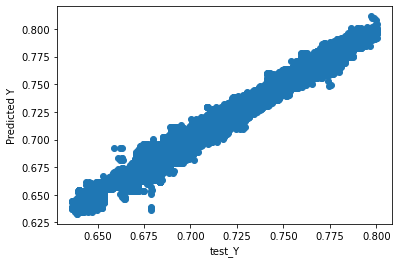

In [43]:
import matplotlib.pyplot as plt
plt.scatter(test_Y,preds_T)
plt.xlabel('test_Y')
plt.ylabel('Predicted Y')

In [36]:
# Check mse using Linear regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(test_Y,preds_T))
print('MSE :'," ", metrics.mean_squared_error(test_Y,preds_T))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(test_Y,preds_T)))

MAE :   0.0024233241396761167
MSE :   1.204575445091093e-05
RMSE :   0.0034706994181160273


/home/ujwal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

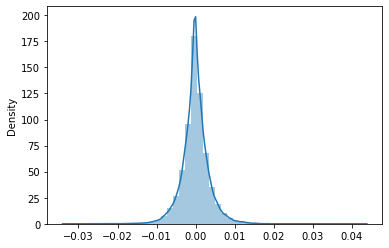

In [44]:
sns.distplot(test_Y - preds_T, bins=50)

In [45]:
# save model using pickle
import pickle
pickle.dump(DTR_T, open('DecisionTreeRegressor.pkl', 'wb'))

In [48]:
# loading model
import pickle

DecisionTreeRegressor_model = pickle.load(open('DecisionTreeRegressor.pkl', 'rb'))

In [57]:
forecast_data = test_X[-1].reshape(1,-1)
forecast = DecisionTreeRegressor_model.predict(forecast_data)
forecast

array([[0.6389 , 0.64   , 0.6411 , 0.6414 , 0.6408 , 0.6359 , 0.63795,
        0.63835, 0.63825, 0.63855]])

In [78]:
# Check mse using Linear regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(test_Y[-1],forecast[0]))
print('MSE :'," ", metrics.mean_squared_error(test_Y[-1],forecast[0]))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(test_Y[-1],forecast[0])))

MAE :   0.001631999999999989
MSE :   3.849699999999922e-06
RMSE :   0.001962065238466836
